# Earthquake prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("Data/train.csv",
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})


print('There are {} measurements in the file.'.format(len(train)))

There are 629145480 measurements in the file.


## Plot the data measurements (sampled at 1/50)

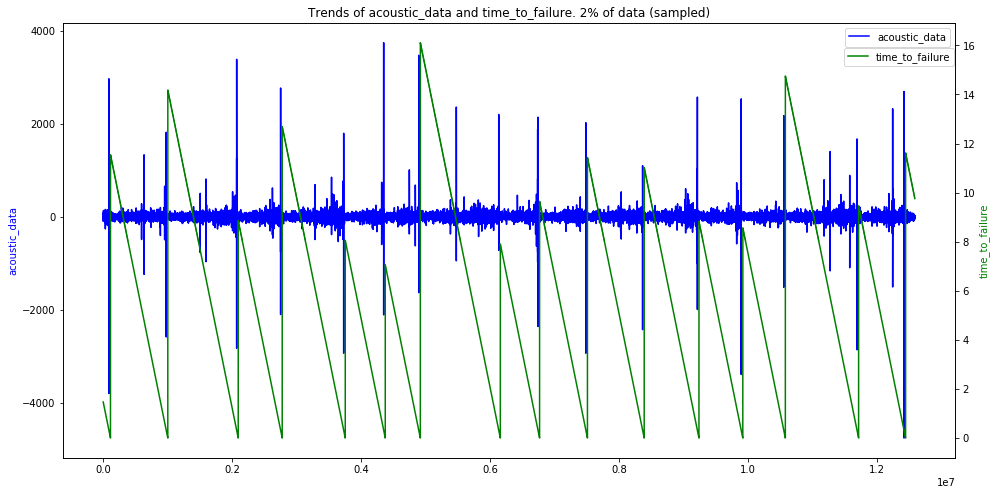

In [2]:
train_acoustic_data_small = train['acoustic_data'].values[::50]
train_time_to_failure_small = train['time_to_failure'].values[::50]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small


## How many events?

In [13]:
#time_0 = train['time_to_failure'].min()
events = (train['time_to_failure']<time_0+9e-9).astype(int)
n_events = sum(events)
print('There are {} events in the data.'.format(n_events))

There are 16 events in the data.


# Summarized data

Read data in chunks of 10.000 rows, and summarize the chunks. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


reader = pd.read_csv("Data/train.csv",
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float16},
                    chunksize=10000)

summary= 'meanAudio stdAudio maxAudio maxTime minAudio minTime q75Audio q25Audio event n'.split()
summarized_data = np.zeros((62915,len(summary)))
i = 0
start_time = time.time()
for df in reader:
    mean = df.mean()
    std = df.std()
    maxi = df.max()
    mini = df.min()
    q75 = df.quantile(.75)
    q25 = df.quantile(.25)
    summarized_data[i,0] = mean[0]
    summarized_data[i,1] = std[0]
    summarized_data[i,2] = maxi[0]
    summarized_data[i,3] = maxi[1]
    summarized_data[i,4] = mini[0]
    summarized_data[i,5] = mini[1]
    summarized_data[i,6] = q75[0]
    summarized_data[i,7] = q25[0]

    summarized_data[i,9] = len(df)
    i=i+1
    if(i%10000==0):
        print(i)
summarized_data = pd.DataFrame(summarized_data,columns=summary)
summarized_data['event'] = (summarized_data['minTime'].diff()>2).astype(int)
events = summarized_data.index[summarized_data['event'] == 1]
summarized_data.to_csv('summarized_data_10000.csv')
print('This took {:.2f} seconds to process'.format(time.time() - start_time))

# Plot chunk summaries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
chunks = pd.read_csv("summarized_data_150000.csv")
print('There are {} chunks in the file.'.format(len(chunks)))

There are 4195 chunks in the file.


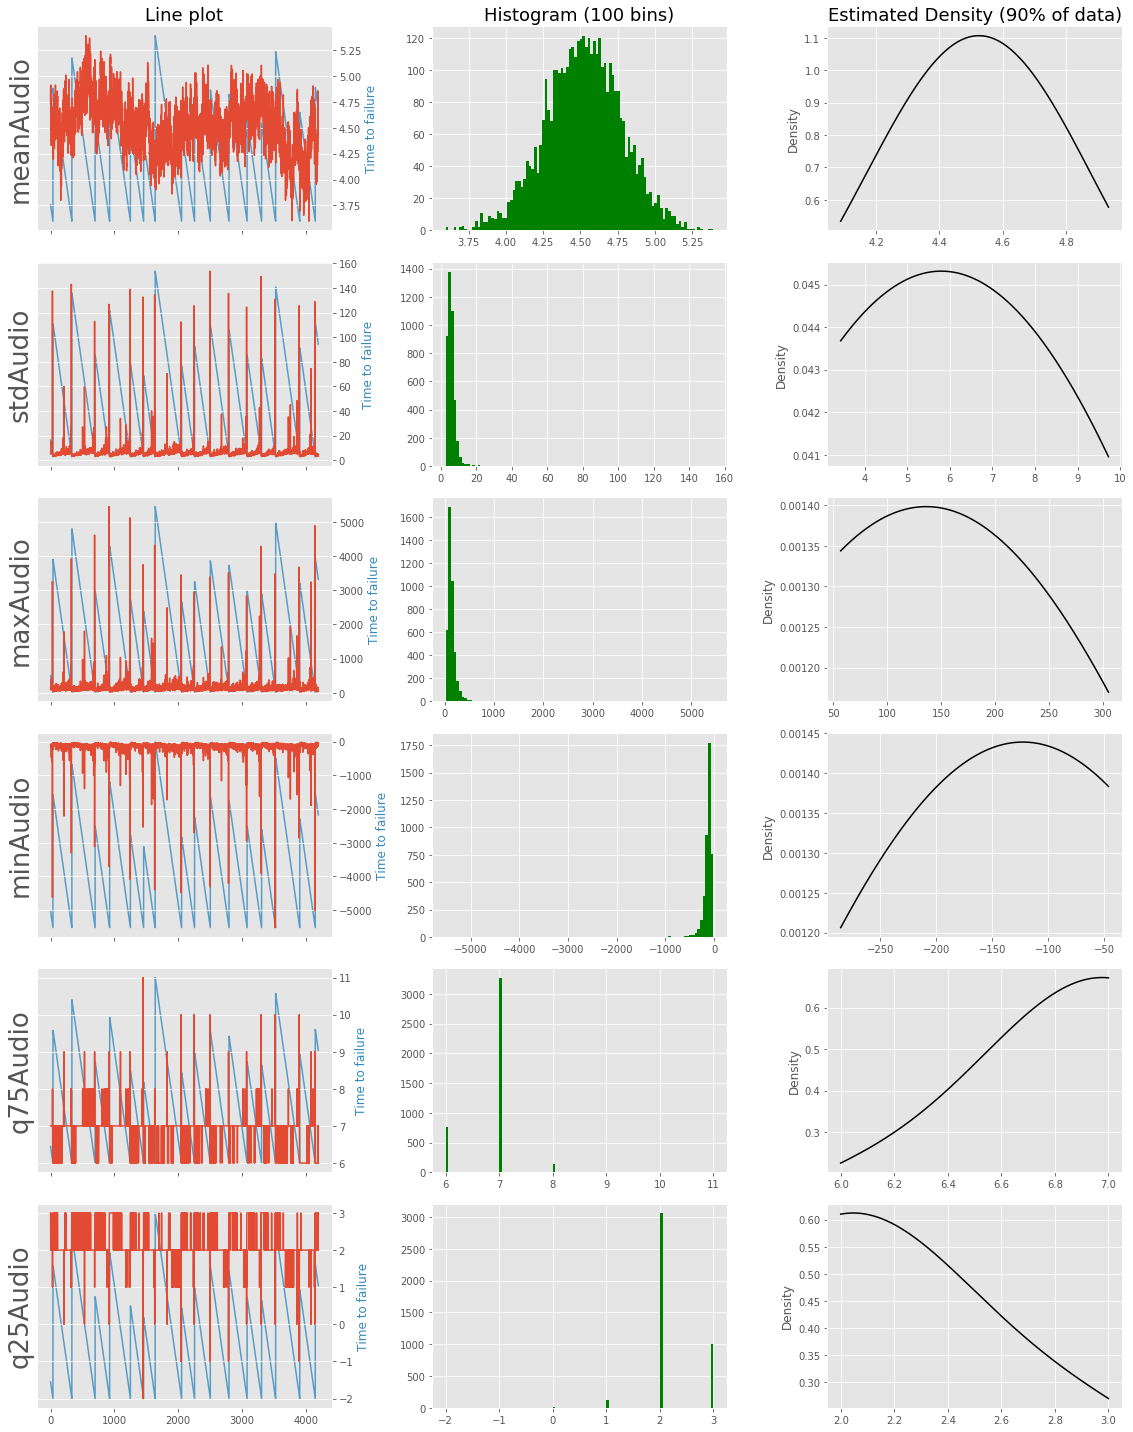

In [17]:
plt.style.use('ggplot')
summary= 'meanAudio stdAudio maxAudio minAudio q75Audio q25Audio'.split()
fig, ax = plt.subplots(len(summary),3,figsize=(16,20))
i=0
for s in summary:
    
    ax2 = ax[i,0].twinx()
    chunks['minTime'].plot(color=list(plt.rcParams['axes.prop_cycle'])[1]['color'],alpha=0.8,ax=ax[i,0])
    ax[i,0].grid(False)
    ax[i,0].tick_params(axis='y',labelleft=False,left=False)
    #ax[i,0].set_ylim([0.1,1])
    chunks[s].plot(ax = ax2,alpha=1)
    ax2.set_ylabel('Time to failure',color=list(plt.rcParams['axes.prop_cycle'])[1]['color'])
    chunks[s].hist(color='g',ax = ax[i,1],bins=100)
    q25 = chunks[s].quantile(.05)
    q75 = chunks[s].quantile(.95)
    rang=np.linspace(q25,q75,num=1000)
    chunks[s].plot.kde(color='k',ax=ax[i,2],bw_method=1,ind=rang)
    ax[i,0].set_ylabel(s,fontsize=26)
    i=i+1
    
ax[0,0].set_title('Line plot',fontsize=18)
ax[0,1].set_title('Histogram (100 bins)',fontsize=18)
ax[0,2].set_title('Estimated Density (90% of data)',fontsize=18)
plt.tight_layout()
plt.savefig('summary.png',dpi=300)




In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

# Bigger chunks

Since the test data is in chunks of 150000 measurements, we'll do the same to the trainingset.

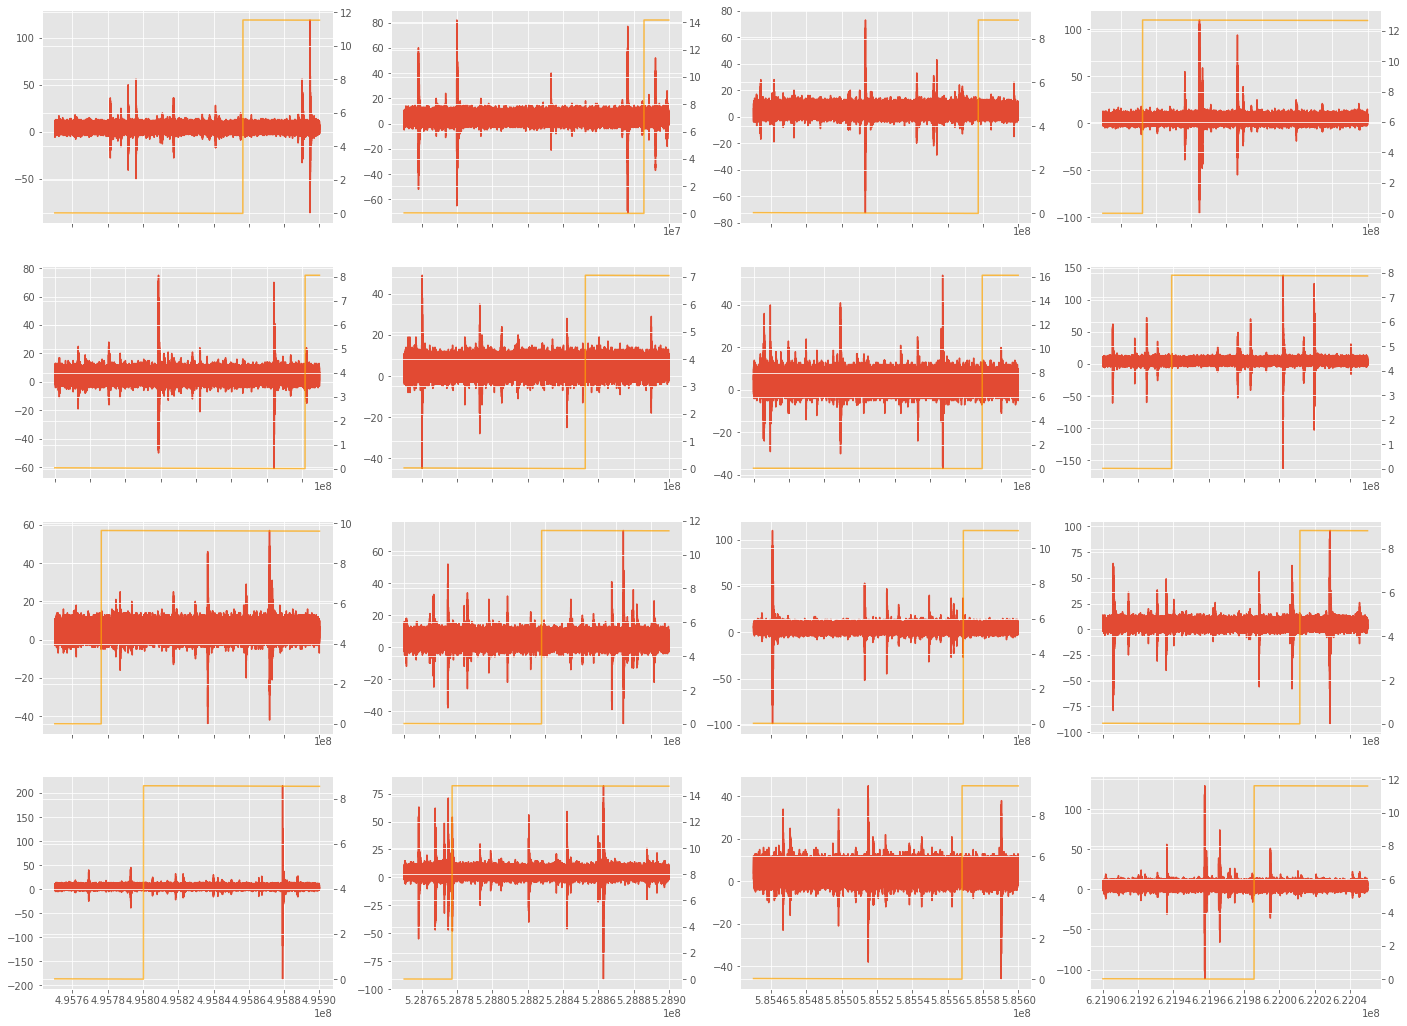

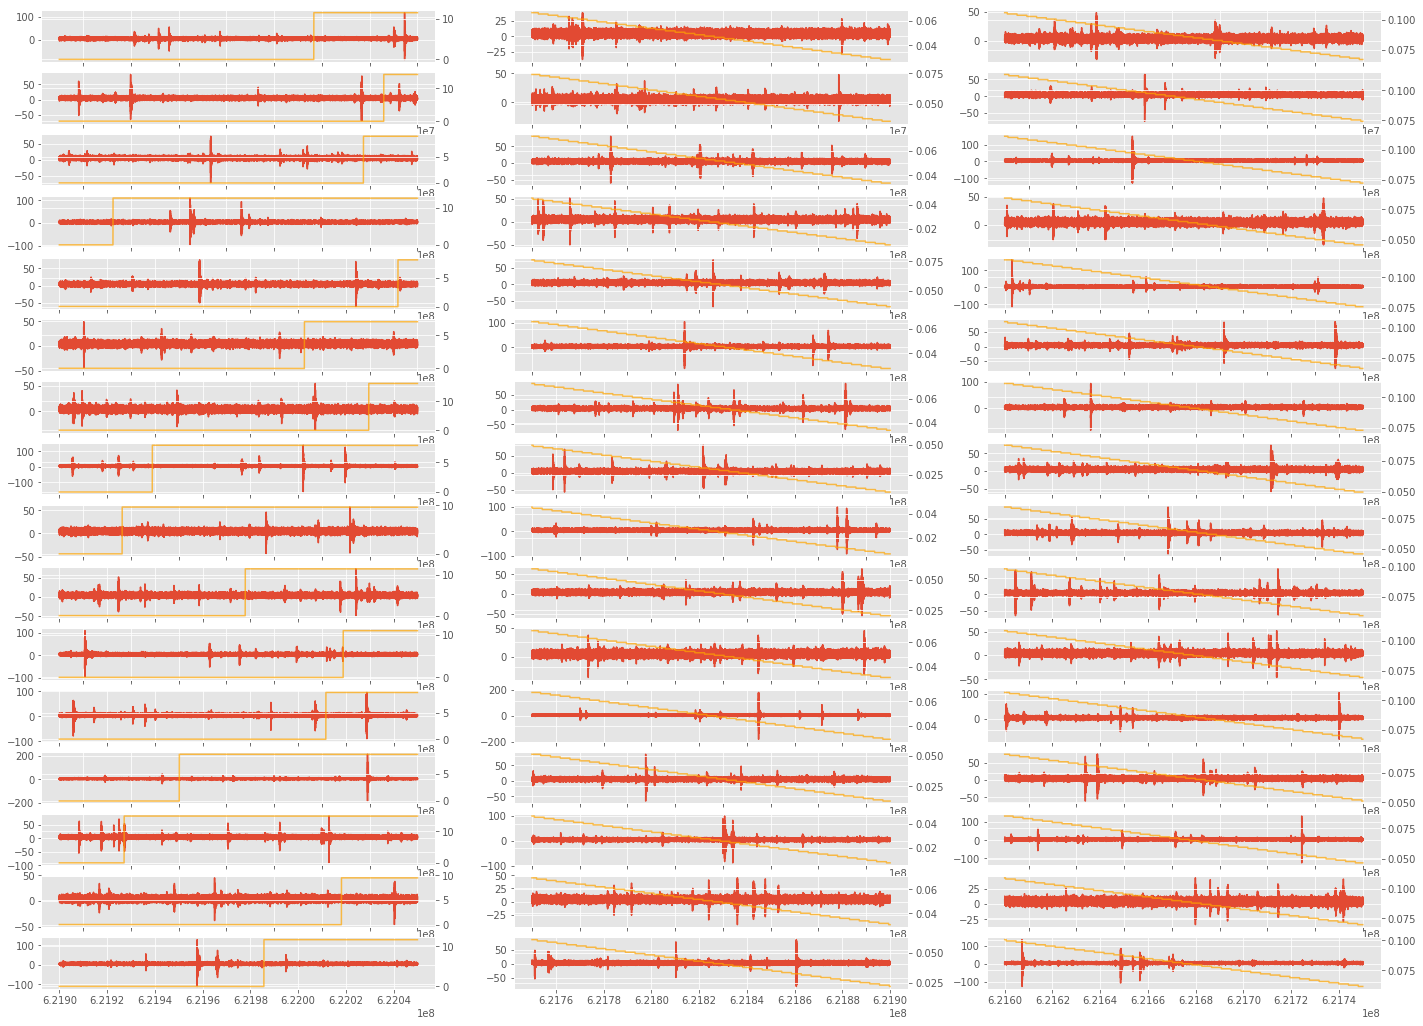

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

events = [38,334,698,926,1251,1458,1639,2053,2256,2503,2796,3079,3306,3526,3904,4147]

reader = pd.read_csv("Data/train.csv",
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32},
                    chunksize=150000)
events_df = []
before_events_df = []
before_before_events = []
i = 0
for df in reader:
    if(i+1 in events):
        events_df.append(df)
    if(i+2 in events):
        before_events_df.append(df)
    if(i+3 in events):
        before_before_events.append(df)
    i=i+1
    
#%%


#%%
    
fig, ax = plt.subplots(4,4,figsize=(24,18))
i=0
for k in range(0,4):
    for j in range(0,4):
        ax2 = ax[k,j].twinx()
        events_df[i]['time_to_failure'].plot(color='orange',ax=ax2,alpha=0.7)
        events_df[i]['acoustic_data'].plot(ax=ax[k,j])        
        i=i+1
        
plt.savefig('events.png',dpi=300)

fig, ax = plt.subplots(16,3,figsize=(24,18))
i=0
for k in range(0,16):
        ax2 = ax[k,0].twinx()
        events_df[i]['time_to_failure'].plot(color='orange',ax=ax2,alpha=0.7)
        events_df[i]['acoustic_data'].plot(ax=ax[k,0])        
        ax2 = ax[k,1].twinx()
        before_events_df[i]['time_to_failure'].plot(color='orange',ax=ax2,alpha=0.7)
        before_events_df[i]['acoustic_data'].plot(ax=ax[k,1])  
        ax2 = ax[k,2].twinx()
        before_before_events[i]['time_to_failure'].plot(color='orange',ax=ax2,alpha=0.7)
        before_before_events[i]['acoustic_data'].plot(ax=ax[k,2])  
        i=i+1
        
plt.savefig('beforebeforeevents.png',dpi=300)
        

## Chunks with events vs chunks without events

Summary values of chunks that contain an event vs chunks that don't.

There are 4195 chunks in the file.


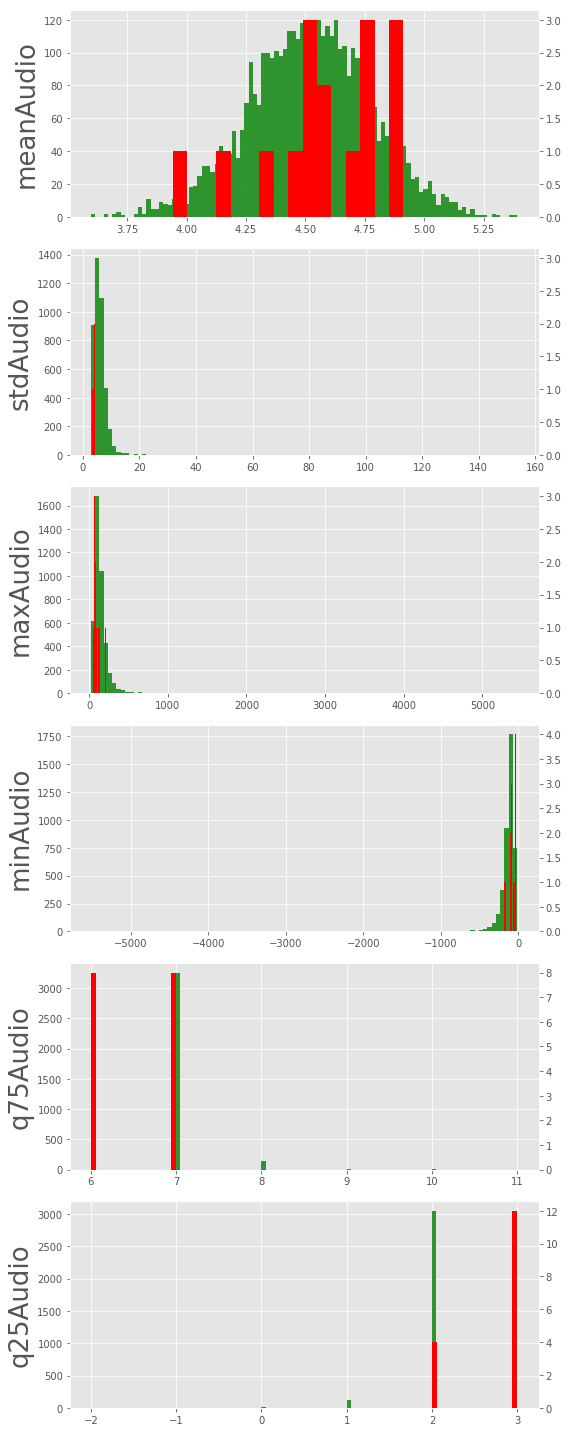

In [4]:
chunks = pd.read_csv("summarized_data_150000.csv")
print('There are {} chunks in the file.'.format(len(chunks)))
events = chunks.index[chunks['event'] == 1]-1

#%%

chunks_event = chunks.iloc[events]
bad_df = chunks.index.isin(events)
chunks_other = chunks[~bad_df]
#%%
plt.style.use('ggplot')
summary= 'meanAudio stdAudio maxAudio minAudio q75Audio q25Audio'.split()
fig, ax = plt.subplots(len(summary),1,figsize=(8,20))
i=0
for s in summary:
    
    chunks_other[s].hist(color='g',ax = ax[i],bins=100,alpha=.8)

    ax2 = ax[i].twinx()

    chunks_event[s].hist(color='r',ax= ax2,bins=16,grid=False)
    ax[i].set_ylabel(s,fontsize=26)
    i=i+1

plt.tight_layout()
plt.savefig('summary2.png',dpi=300)

## Chunks with events vs chunks without events vs chunks before events?

That doesn't seem to be very seperable. What about the chunks before the events?


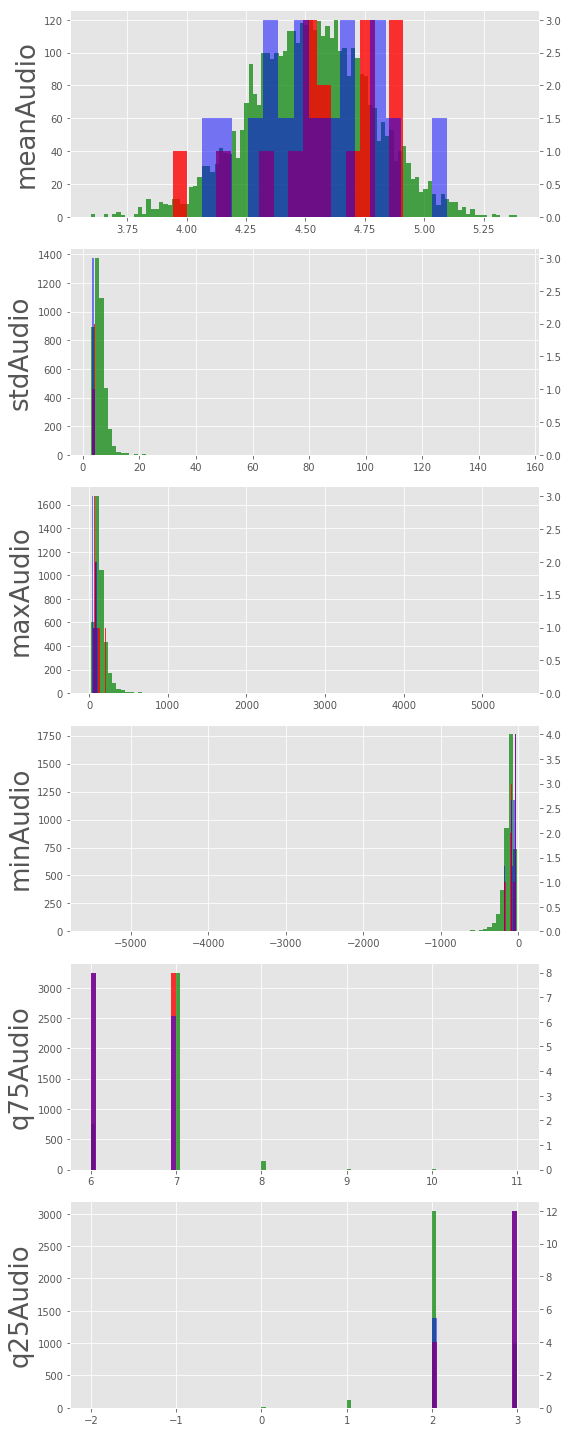

In [12]:
events = chunks.index[chunks['event'] == 1]-1

chunks_before_event = chunks.iloc[events-1]
bad_df = chunks.index.isin(list(events) + (list(events-1)))
chunks_other = chunks[~bad_df]
#%%
plt.style.use('ggplot')
summary= 'meanAudio stdAudio maxAudio minAudio q75Audio q25Audio'.split()
fig, ax = plt.subplots(len(summary),1,figsize=(8,20))
i=0
for s in summary:
    
    chunks_other[s].hist(color='g',ax = ax[i],bins=100,alpha=.7)
    ax2 = ax[i].twinx()
    chunks_event[s].hist(color='r',ax= ax2,bins=16,grid=False,alpha=.8)
    ax3 = ax[i].twinx()
    ax3.set_yticks([])
    chunks_before_event[s].hist(color='b',ax=ax3,bins=16,grid=False,alpha=.5)
    ax[i].set_ylabel(s,fontsize=26)
    i=i+1

plt.tight_layout()
plt.savefig('summary3.png',dpi=300)